# Nenadgledano

U nenadgledanom učenju model se trenira na osnovu x vrednosti primera, bez pratećih izlaza y. Cilj je da se otkrije „skrivena“ struktura u podacima, odnosno da se nauči reprezentacija koja opisuje unutrašnje odnose među podacima. Ovakav pristup može pomoći u identifikaciji obrazaca i veza u okviru skupa podataka. Pošto nema poznatih izlaza, ne postoji jedinstven standard za merenje performansi modela.
Postupci se dele na:
* Klasterizacija/klasterovanje  - grupisanje podataka na osnovu sličnosti
* Redukcija dimenzionalnosti  - otkrivanje najdeskriptivnijih osobina podataka
* Asocijativna pravila  - pronalaženje uobičajenih kombinacija osobina podataka


![img/unsupervised-lr.jpg](img/unsupervised-lr.jpg)

# Klasterovanje

### 📚 Definicija

Klasterovanje je tip nenadgledanog učenja koji se koristi za grupisanje međusobno sličnih podataka.

Često se koristi za redukciju dimenzionalnosti i detekciju autlajera.

---


## K Means

K-means spada u ne-hijerarhijske metode grupisanja, što znači da unapred definiše broj grupa (klastera) i pokušava da dodeli podatke tim grupama na osnovu njihove međusobne sličnosti. Ovaj algoritam se često koristi u okviru procesa eksplorativne analize podataka, kada želimo da bolje razumemo strukturu skupa podataka, bez prethodnog znanja o tome kako bi oni trebalo da budu raspoređeni.

⚙️ Pseudo-kod:

```
za svaku grupu inicijalizovati nasumično centar
dok se ne dostigne maksimalan broj iteracija ili dok se centri ne prestanu kretati:
    pridruži svaki element grupi sa njemu najbližim centrom grupe
    ažuriraj pozicije centra svih grupa na osnovu novih elemenata
```

![img/kmeans.gif](img/kmeans.gif)

Za izračunavanje udaljenosti između podataka u K-means algoritmu koriste se različite metrike sličnosti, od kojih se najčešće koristi Euklidovo rastojanje kao mera bliskosti između tačaka u prostoru.

Pošto se početni centri klastera (centroidi) biraju nasumično, algoritam je stohastičke prirode – to znači da rezultati mogu da variraju u zavisnosti od inicijalizacije. Zbog toga se često pokreće više puta, pa se kao konačan rezultat bira onaj sa najboljom (najnižom) vrednošću unutrašnje varijanse ili neke druge funkcije troška.


---

#### Određivanje optimalnog K

Kako znati unapred koliko ima klastera?

Kada su podaci dvodimenzionalni, broj klastera se može lako naslutiti putem vizuelizacije. Međutim, u stvarnosti podaci često imaju mnogo više od dve dimenzije, što otežava vizuelnu procenu. U oblasti mašinskog učenja ova pojava je poznata kao "kletva dimenzionalnosti" (eng. curse of dimensionality).

Određivanje optimalne vrednosti za K (broj klastera) je problem koji je mnogo proučavan. Jedna od najčešće korišćenih heurističkih tehnika za rešavanje ovog problema je tzv. metoda lakta (eng. elbow method).
Postupak ide ovako:
- Za više različitih vrednosti K (npr. 2, 4, 6, 8, ..., 20) primenjuje se klasterovanje,
- Za svaku vrednost K izračunava se suma kvadratnih grešaka (SSE) – ukupna „udaljenost“ svih tačaka od centara svojih klastera,
- Matematički, SSE se računa kao:

$ SSE = \sum_{i=1}^{K} \sum_{x \in c_{i}} dist(x, c_{i})^{2} $, gde je *dist* euklidska udaljnost.

gde je *dist* Euklidska udaljenost, $ c_{i} $ centar i-tog klastera, a 𝑥 tačka unutar tog klastera.

Zatim se nacrta graf na kojem je X osa broj klastera (K), a Y osa vrednost SSE. Na osnovu grafika traži se „lakat“ – tačka nakon koje dalji rast broja klastera dovodi do relativno male promene u SSE. Ta vrednost K se tada uzima kao optimalna jer dalje povećavanje broja klastera više ne donosi značajno poboljšanje kompaktnosti.

Primer 1:

![img/sse2.png](img/sse2.png)

Primer 2:

![img/sse.png](img/sse.png)

---

#### Prednosti K-means

* Jednostavan i lako razumljiv
* Laka implementacija
* Relativno dobre performanse (za malo K)
* Odličan kada su klasteri sferičnog/globularnog oblika (malo formalnije hiper-sferičnog, za sfere u >3 dimenzija)

#### Mane K-means
* Potrebno unapred znati K (što je nekad teško odrediti)
* Nije deterministički - pošto se centri inicijalizuju nasumično, nekad se dobijaju drugačiji rezultati
* Osetljiv na šum
* Kada podaci nisu globularnog oblika -> beskoristan (pogledati donju sliku)
* Nema mogućnost hijerarhijskog klasterovanja (razlikovanje više manjih podklastera unutar većeg klastera)

![img/kmeans_fail.png](img/kmeans_fail.png)

---






Importovanje biblioteka i sintetički podaci:

In [79]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)


KMeans sa 2 klastera i prikazom labela:

In [80]:
kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

Labele klastera po podacima:

In [81]:
kmeans_labels = kmeans.labels_
kmeans_labels[:5]

array([1, 1, 0, 2, 1], dtype=int32)

Nove predikcije:

In [82]:
kmeans.predict([[0, 0], [12, 3]])

array([2, 2], dtype=int32)

Prikaz cenatara:

In [83]:
kmeans.cluster_centers_

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

Elbow metoda:

/usr/local/lib/python3.12/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.12/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


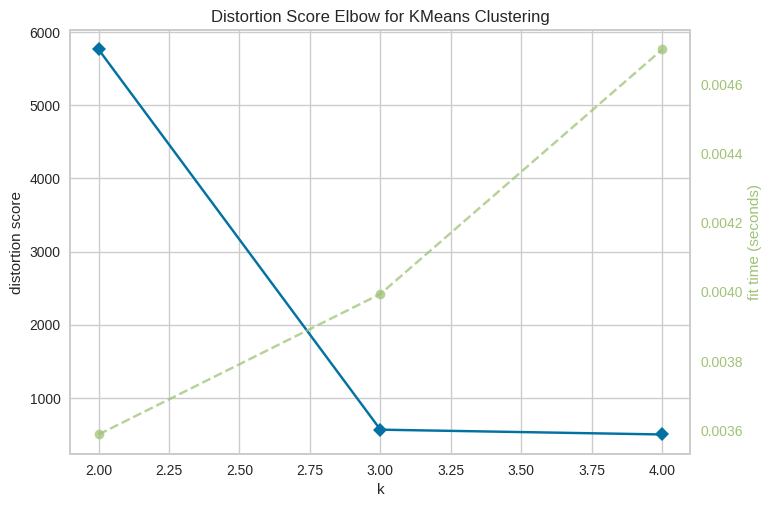

In [84]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt


visualizer = KElbowVisualizer(kmeans, k=(2,5))

visualizer.fit(X)
visualizer.show()
plt.show()

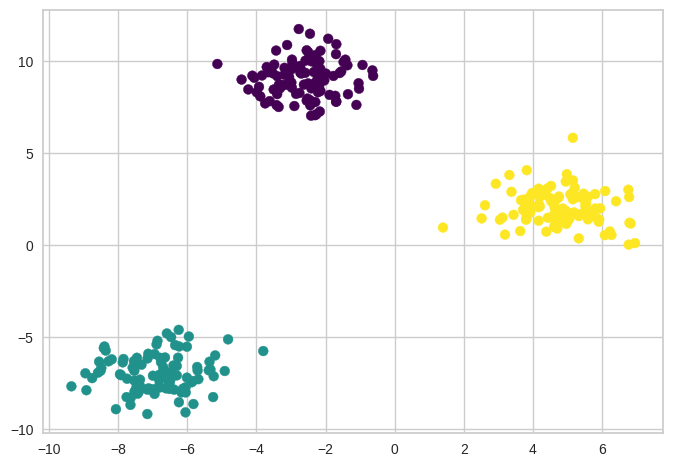

In [85]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)

## DBSCAN (Density-based spatial clustering of applications with noise)

DBSCAN je algoritam za klasterovanje podataka koji se zasniva na ideji da klasteri predstavljaju guste regione tačaka u prostoru, dok se retko raspoređene tačke smatraju šumom (engl. noise). Za razliku od algoritama kao što je K-means, DBSCAN ne zahteva da se unapred zada broj klastera, što ga čini pogodnim za podatke nepoznate strukture.

Pre nego što objasnimo korake algoritma, moramo objasniti dva pojma: parametre koji određuju kriterijume formiranja klastera i tipove tačaka koje se mogu pojaviti tokom procesa klasterovanja.

1. Vrste tačaka:
U okviru DBSCAN-a razlikuju se tri vrste tačaka:
- Ključne tačke (core points): imaju dovoljno suseda u svojoj blizini (najmanje minPts);
- Granične tačke (border points): same nemaju dovoljno suseda, ali se nalaze u epsilon okruženju neke ključne tačke;
- Šum (noise): tačke koje ne pripadaju nijednom klasteru.

2. Parametri algoritma:
DBSCAN koristi dva osnovna parametra:
- ε (epsilon): maksimalna udaljenost između dve tačke da bi bile smatrane susedima;
- minPts: minimalan broj tačaka potreban da se neka oblast smatra gustim regionom.

Udaljenost se najčešće računa pomoću Euklidske distance, ali se mogu koristiti i druge metrike.


⚙️ Koraci algoritma:

1. Početak algoritma - inicijalizacija početnih tačaka:
Izabere se proizvoljna tačka iz skupa. Ako se u njenoj ε (epsilon) okolini nalazi najmanje minPts tačaka, tačka se označava kao ključna i započinje se novi klaster Ako ne ispunjava uslov, privremeno se označava kao šum. Međutim, tačka se kasnije može pridružiti klasteru ukoliko bude obuhvaćena epsilon okolinom neke druge ključne tačke.

2. Širenje klastera:
Sve tačke u ε (epsilon) okolini ključne tačke dodaju se u klaster. Za svaku od tih tačaka se proverava da li je i sama ključna. Ako jeste, njena okolina se takođe dodaje u klaster (rekurzivno). Proces se nastavlja dok se ne proširi ceo klaster.

3. Nastavak algoritma:
Nakon završetka jednog klastera, bira se nova neposećena tačka i algoritam se ponavlja. Tačka može započeti novi klaster ili biti označena kao šum, u zavisnosti od gustine njene okoline.



![img/dbscan.png](img/dbscan.png)

Prikaz rada DBSCAN algoritma:

![img/DBSCAN_tutorial.gif](img/DBSCAN_tutorial.gif)

---

Razlika između KMeans-a i DBSCAN-a za isti skup podataka:

![img/kmeans_vs_dbscan.png](img/kmeans_vs_dbscan.png)

#### Prednosti DBSCAN

* Nije potrebno unapred znati broj klastera (kao kod K-means)
* Klasteri mogu biti proizvoljnog oblika
* Ume da tretira šum
* Parametre epsilon i minPts je lako menjati u cilju dobijanja klastera različitih veličina i oblika, ove parametre često podešavaju eksperti sa domenskim znanjem


#### Mane DBSCAN

* Kvalitet rezultata zavisi od toga čime se meri epsilon. Obično je to euklidska udaljenost, ali za višedimenzionalne podatke potrebne su drugačije metrike
* Kada postoje varijacije u gustini klastera, nemoguće je odrediti epsilon i minPts da odgovara svim klasterima
* U slučaju kada ne postoji ekspert sa domenskim znanjem, određivanje epsilon i minPts parametara je često dosta teško

---

Import i sintetički podaci:

In [91]:
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_blobs(n_samples=800, n_features=2, centers=4, random_state=42)

Inicijalizacija DBSCAN-a:

In [92]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=2)

Prikaz labela:

In [95]:
dbscan_labels = dbscan.labels_
dbscan_labels[5]

np.int64(0)

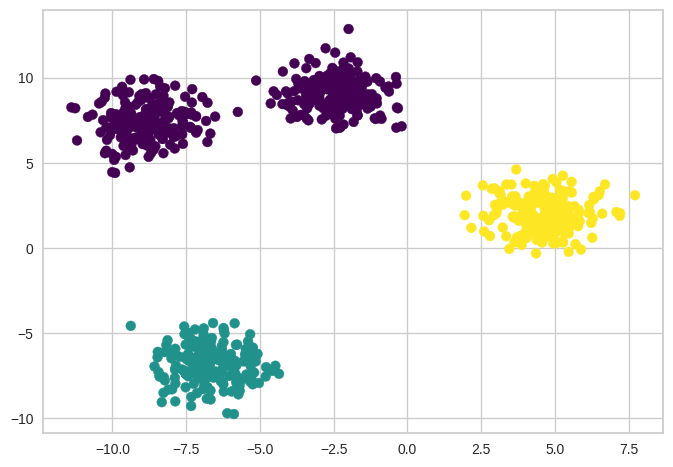

In [94]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50)